In [1]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os
import pandas as pd
from cherepaha_data_list import files_set_nov_29_2022, data_base_dir

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(f"Believed path is: {dir_path}")

Believed path is: /home/romanov/eic/kak-bog-cherepahu/analysis


In [2]:
def read_modules_de(file_name, entry_start = 0, entry_stop = 100000):
    tree = uproot.open(file_name)["tree_crystals"]
    module_de_flat = tree['edep'].array(entry_start=entry_start, entry_stop=entry_stop).to_numpy()
    return module_de_flat

In [3]:
pi_de_flat = read_modules_de(f"{data_base_dir}/{files_set_nov_29_2022[1]}")
pi_sum_e = np.sum(pi_de_flat, axis=1)

e_de_flat = read_modules_de(f"{data_base_dir}/{files_set_nov_29_2022[0]}")
e_sum_e = np.sum(e_de_flat, axis=1)

In [4]:
import plotly.express as px
import plotly.graph_objects as go

fig =px.scatter(x=range(10), y=range(10))
#fig.write_html("html_plots/file.html")

fig = go.Figure()
fig.add_trace(go.Histogram(x=pi_sum_e/1000))
fig.add_trace(go.Histogram(x=e_sum_e/1000))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()


[]

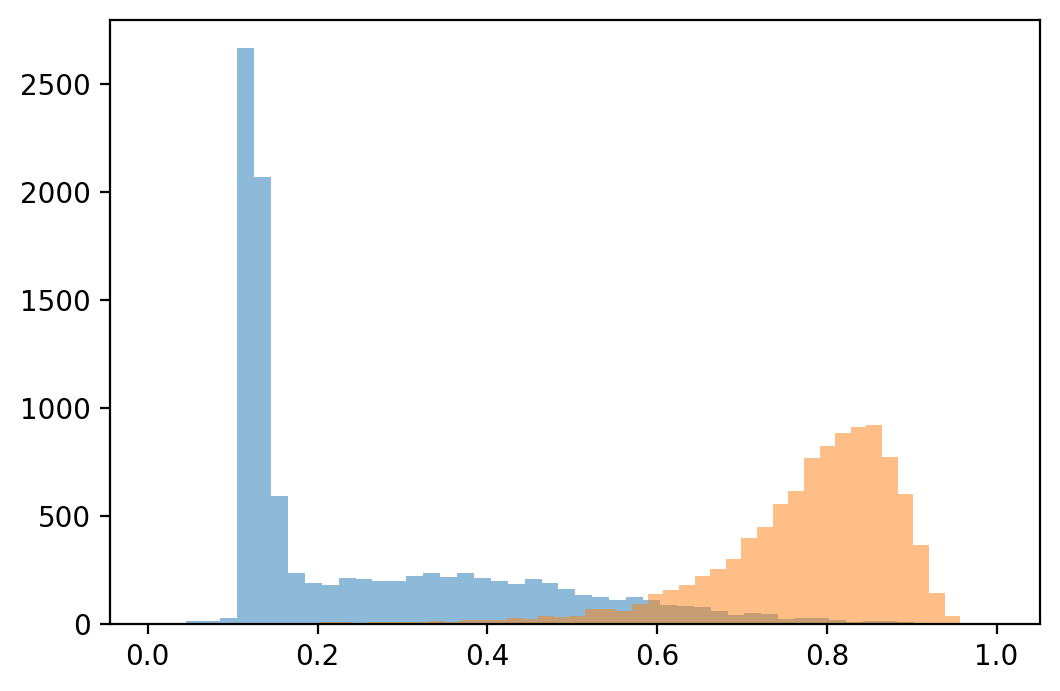

In [5]:
fig, axs = plt.subplots()

# We can set the number of bins with the *bins* keyword argument.
axs.hist(pi_sum_e/1000, bins=50, alpha = 0.5)
axs.hist(e_sum_e/1000, bins=50, alpha = 0.5)
plt.plot()

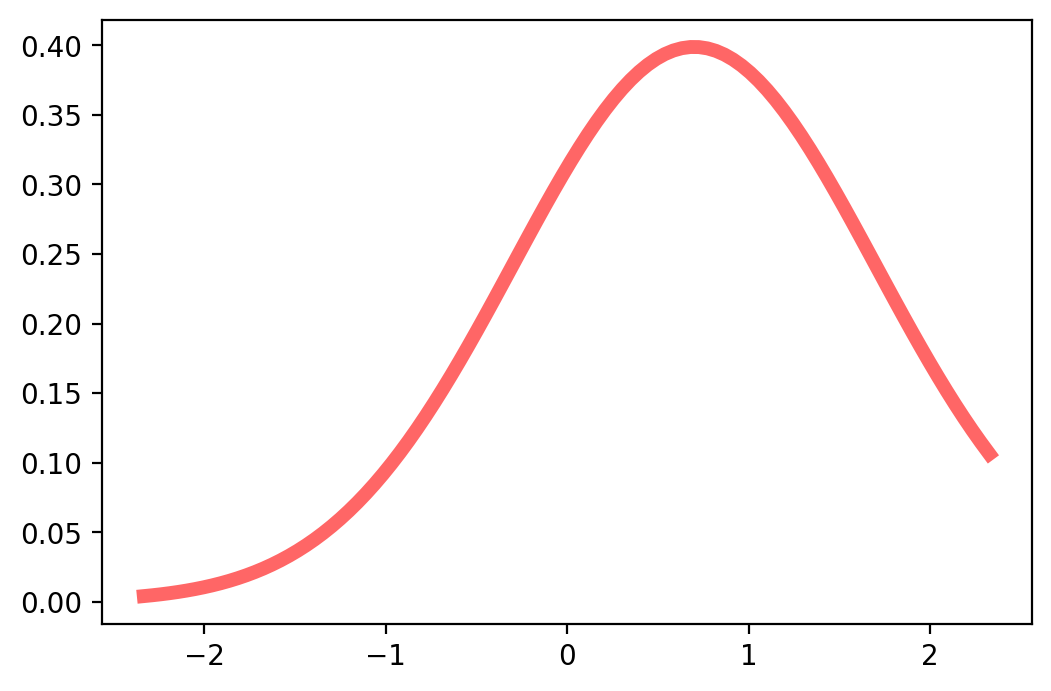

In [6]:
from scipy.stats import crystalball, norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
beta, m = 3, 40

mean, var, skew, kurt = crystalball.stats(beta, m, moments='mvsk')
x = np.linspace(crystalball.ppf(0.01, beta, m),
                crystalball.ppf(0.99, beta, m), 100)

ax.plot(x, crystalball.pdf(x, beta, m, loc=0.7), 'r-', lw=5, alpha=0.6, label='crystalball pdf')

In [7]:
e_sum_e_dp = e_sum_e/1000
fit_params = crystalball.fit(e_sum_e_dp, loc=0.6)
beta, m, loc_crystal, scale = fit_params
fit_params



(0.42087803501110066,
 2907861.2870125077,
 0.8389316685990861,
 0.044235492651617345)

(0.7793613021338706, 0.10553453747650643)


(array([0.00543237, 0.01086474, 0.        , 0.00543237, 0.        ,
        0.00543237, 0.        , 0.00543237, 0.00543237, 0.02716185,
        0.03259422, 0.01086474, 0.02716185, 0.04889133, 0.02716185,
        0.02716185, 0.0543237 , 0.04889133, 0.08148555, 0.08691792,
        0.09235029, 0.13037688, 0.1086474 , 0.17926821, 0.1629711 ,
        0.19556531, 0.35853641, 0.36940115, 0.32050982, 0.48891329,
        0.7388023 , 0.84201733, 0.96152946, 1.19512137, 1.3689572 ,
        1.61884622, 2.14578609, 2.42826932, 3.02039764, 3.32461035,
        4.17206005, 4.47084039, 4.78591784, 4.9543213 , 4.99234789,
        4.19922189, 3.25398954, 1.96651789, 0.76596415, 0.20099768]),
 array([0.03670399, 0.05511216, 0.07352034, 0.09192851, 0.11033668,
        0.12874485, 0.14715302, 0.1655612 , 0.18396937, 0.20237754,
        0.22078571, 0.23919389, 0.25760206, 0.27601023, 0.2944184 ,
        0.31282658, 0.33123475, 0.34964292, 0.36805109, 0.38645926,
        0.40486744, 0.42327561, 0.44168378, 0.

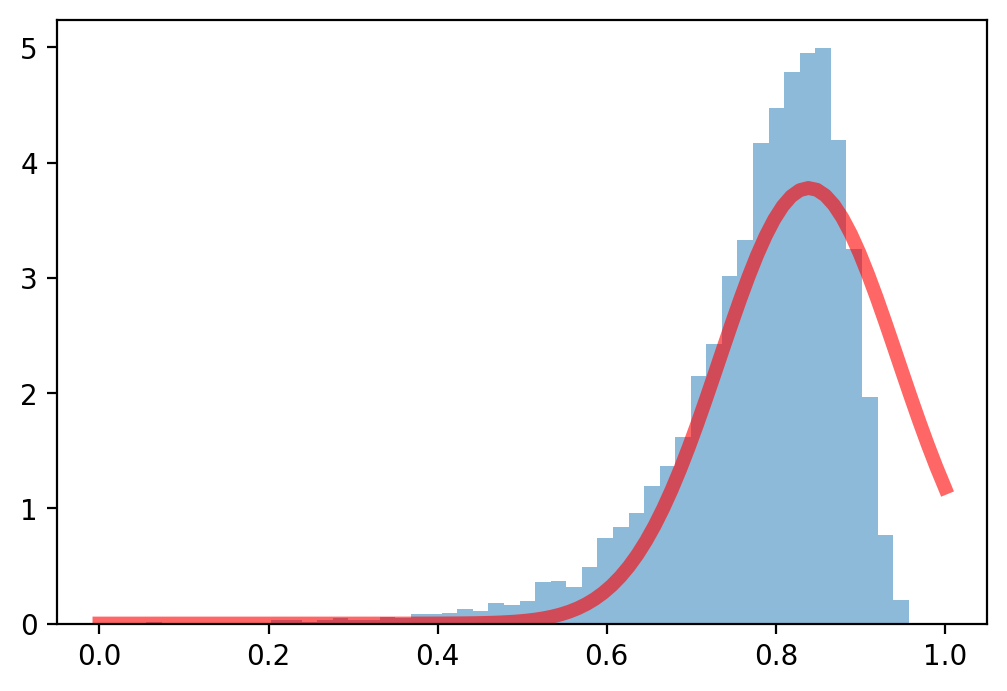

In [8]:
e_sum_e_dp = e_sum_e/1000
fit_results = norm.fit(e_sum_e_dp)
print(fit_results)
x = np.linspace(0, 1, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x, loc=loc_crystal, scale=fit_results[1]), 'r-', lw=5, alpha=0.6, label='crystalball pdf')


ax.hist(e_sum_e_dp, bins=50, alpha = 0.5, density=True)

In [9]:
def get_wrong_counts(array, separation):
    above = np.size(array[array>separation])
    below = np.size(array[array<=separation])
    return above, below, above/np.size(array), below/np.size(array)

get_wrong_counts(e_sum_e_dp, 0.6)

(9389, 611, 0.9389, 0.0611)

In [10]:
norm.fit(pi_sum_e/1000)


(0.25531685248704716, 0.1753338139726783)

In [11]:
def electron_peak_fit(data):
    cb_beta, cb_m, cb_loc, cb_scale = crystalball.fit(data, loc=0.6)
    norm_loc, norm_scale = norm.fit(data)
    return 

In [12]:
#p = (crystalball.pdf(x, beta, m, scale=scale, loc=loc) * integral)

#p = (norm.pdf(centres, mu, std) * integral)

# x = np.linspace(-1, 1, 100)
# x
# plt.plot(x, crystalball.pdf(x, beta=beta, m=m, loc=loc, scale=scale),  'k', linewidth=2)

crystalball.ppf(0.01, beta, m)

/usr/local/lib/python3.8/dist-packages/scipy/stats/_continuous_distns.py:8969: RuntimeWarning:

divide by zero encountered in power



-inf

In [13]:
import pandas as pd

all_vals_df = pd.read_feather("2022-11-29_cherepaha_SciGlass-4-1-L_13x13_20x20x200mm_1-10GeV_e-pi-_10kev-each.feather")
all_vals_df["e_div_p"] = all_vals_df.de_sum/(all_vals_df.p*1000)
all_vals_df.head()

p prt_name      de_sum  \
0  1.0       e-  745.830705   
1  1.0       e-  723.557254   
2  1.0       e-  810.117192   
3  1.0       e-  853.066921   
4  1.0       e-  879.492094   

                                              towers   e_div_p  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.745831  
1  [0.0, 0.0, 0.33505856326162586, 0.0, 0.0, 0.0,...  0.723557  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.810117  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.853067  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.879492

(200000, 169)

10000
10000
0.42087803501110066 2907861.2870125077 0.8389316685990861 0.044235492651617345
0.7793613021338706 0.10553453747650643
0.6278625936460732 0.0463 0.0845 0.9155 10000


[]

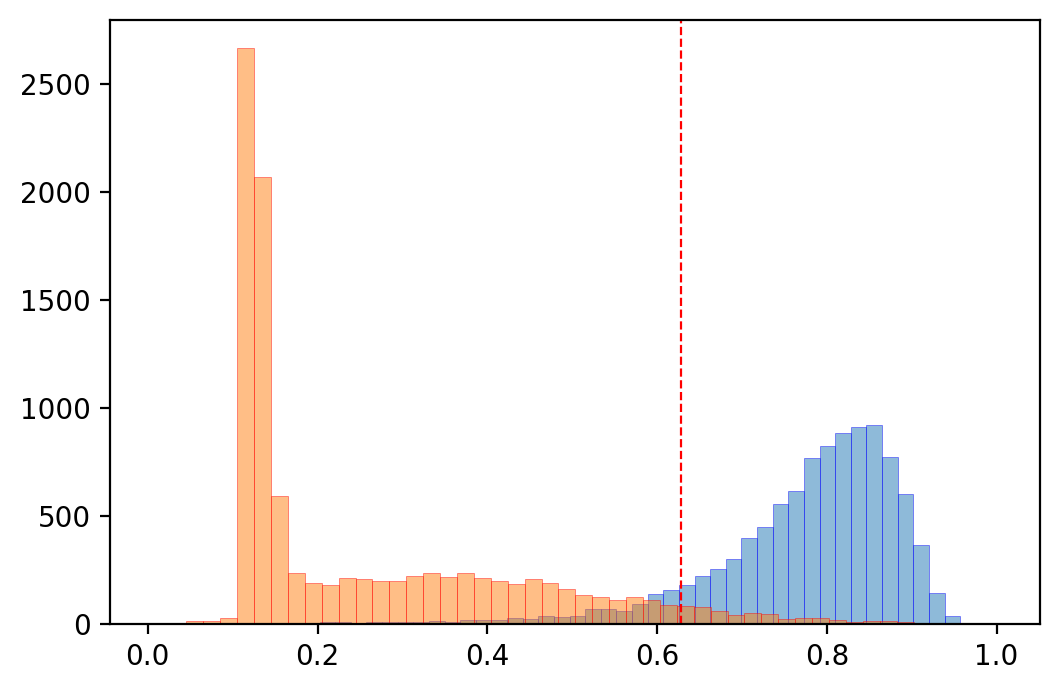

In [14]:
e_min = 0.5
e_max = 1.5
e_1gev_df = all_vals_df.query(f"({e_min} < p < {e_max}) and prt_name=='e-'")
pi_1gev_df = all_vals_df.query(f"({e_min} < p < {e_max}) and prt_name=='pi-'")
print(len(e_1gev_df))
print(len(e_1gev_df.e_div_p))

e_df = e_1gev_df
pi_df = pi_1gev_df

# Fit with crystalball and gauss
cb_beta, cb_m, cb_loc, cb_scale = crystalball.fit(e_df.e_div_p, loc=0.6)
norm_loc, norm_scale = norm.fit(e_df.e_div_p)
print(cb_beta, cb_m, cb_loc, cb_scale)
print(norm_loc, norm_scale)

# where we separate
separ_x = cb_loc - norm_scale*2
n_pi_above_num = np.size(pi_df.query(f"e_div_p > {separ_x}").e_div_p)
n_e_below_num = np.size(e_df.query(f"e_div_p <= {separ_x}").e_div_p)
n_e_above_num = np.size(e_df.query(f"e_div_p > {separ_x}").e_div_p)

n_pi_above = n_pi_above_num / np.size(pi_df.e_div_p)
n_e_below = n_e_below_num / np.size(e_df.e_div_p)
n_e_above = n_e_above_num / np.size(e_df.e_div_p)

print(separ_x, n_pi_above, n_e_below, n_e_above, np.size(e_df.e_div_p))

# We can set the number of bins with the *bins* keyword argument.
fig, axs = plt.subplots()
axs.axvline(x=separ_x, color='red', linestyle='--', linewidth=0.8)
axs.hist(e_1gev_df.e_div_p, bins=50, alpha = 0.5, edgecolor='blue', linewidth=0.3)
axs.hist(pi_1gev_df.e_div_p, bins=50, alpha = 0.5, edgecolor='red', linewidth=0.3)
plt.plot()

In [18]:
def make_2sigma_separation(e_df, pi_df):
    # Fit with crystalball and gauss
    cb_beta, cb_m, cb_loc, cb_scale = crystalball.fit(e_df.e_div_p, loc=0.6)
    norm_loc, norm_scale = norm.fit(e_df.e_div_p)
    print(cb_beta, cb_m, cb_loc, cb_scale)
    print(norm_loc, norm_scale)

    # where we separate
    separ_x = cb_loc - norm_scale*2
    n_pi_above_num = np.size(pi_df.query(f"e_div_p > {separ_x}").e_div_p)
    n_e_below_num = np.size(e_df.query(f"e_div_p <= {separ_x}").e_div_p)
    n_e_above_num = np.size(e_df.query(f"e_div_p > {separ_x}").e_div_p)

    n_pi_above = n_pi_above_num / np.size(pi_df.e_div_p)
    n_e_below = n_e_below_num / np.size(e_df.e_div_p)
    n_e_above = n_e_above_num / np.size(e_df.e_div_p)

    print(separ_x, n_pi_above, n_e_below, n_e_above, np.size(e_df.e_div_p))

    # We can set the number of bins with the *bins* keyword argument.
    fig, axs = plt.subplots()
    axs.axvline(x=separ_x, color='red', linestyle='--', linewidth=0.8)
    axs.hist(e_df.e_div_p, bins=50, alpha = 0.5, edgecolor='blue', linewidth=0.3)
    axs.hist(pi_df.e_div_p, bins=50, alpha = 0.5, edgecolor='red', linewidth=0.3)
    plt.plot()

10000
10000
0.7666004620368501 4806066.088411894 0.5972604704155269 0.07263826166168197
0.5657459586745346 0.10546816163996114
0.3863241471356046 0.0631 0.0613 0.9387 10000


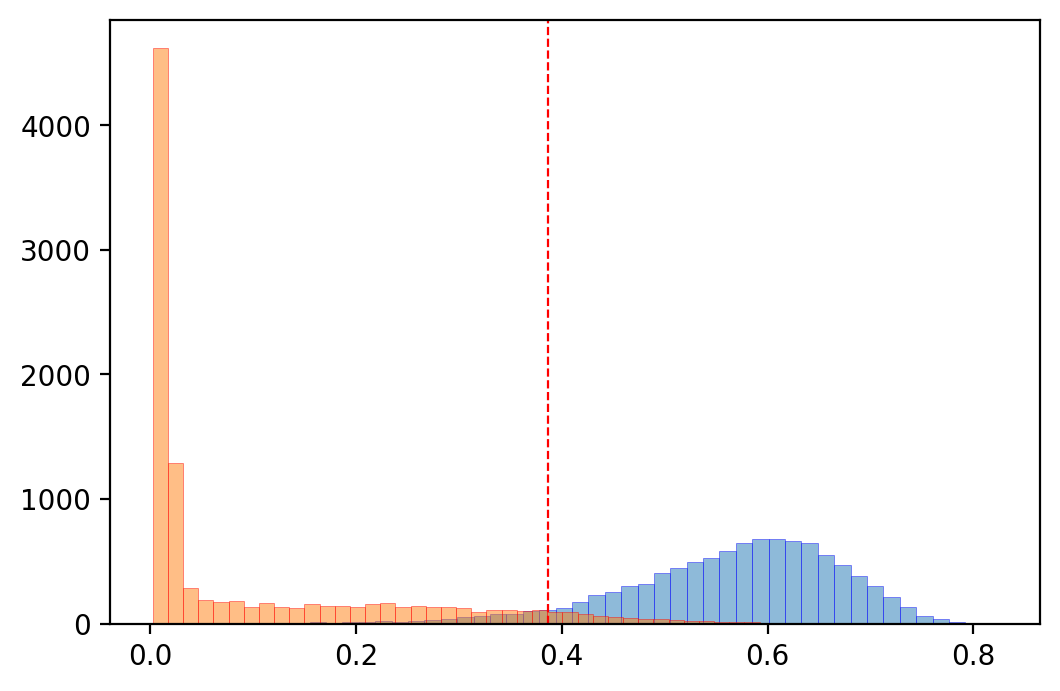

In [19]:
e_min = 8.5
e_max = 9.5
e_9gev_df = all_vals_df.query(f"({e_min} < p < {e_max}) and prt_name=='e-'")
pi_9gev_df = all_vals_df.query(f"({e_min} < p < {e_max}) and prt_name=='pi-'")
print(len(e_9gev_df))
print(len(e_9gev_df.e_div_p))

make_2sigma_separation(e_9gev_df, pi_9gev_df)